# Section 1

In [69]:
import warnings
warnings.filterwarnings("ignore")


## Loading Data

In [2]:
import sklearn.datasets

# Loading the dataset
iris = sklearn.datasets.load_iris()

In [3]:
# Extracting features and labels and ensuring that labels are one-hot encoded

X = iris.data
y = iris.target

print("Shape of data: ",X.shape)
print("Shape of labels: ",y.shape)

# Performing one-hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray() 
#np.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. Thus, 1D array will become 2D array.
#toarray() is used to convert the sparse matrix to dense matrix
#fit_transform() is used to fit the data and then transform it

print("Shape of labels after one-hot encoding: ",y.shape)
print("Count of each class: ",y.sum(axis = 0))

Shape of data:  (150, 4)
Shape of labels:  (150,)
Shape of labels after one-hot encoding:  (150, 3)
Count of each class:  [50. 50. 50.]


In [4]:
# Train-test split (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalizing the data to [0,1] using standard scaling
from sklearn.preprocessing import MinMaxScaler

print("First 5 rows of training data before scaling: \n",X_train[:5])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MinMaxScaler formula: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#                       X_scaled = X_std * (max - min) + min

print("First 5 rows of training data after scaling: \n",X_train[:5])

First 5 rows of training data before scaling: 
 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
First 5 rows of training data after scaling: 
 [[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]


## Model training and evaluation

Model:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.

Hyperparameters:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Clear any existing model in memory
keras.backend.clear_session()

# Defining the MLP model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy())

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
print("Finished training")

Epoch 1/50


In [ ]:
# Evaluating the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("First 5 predictions: \n",y_pred[:5])
print("First 5 actual: \n",y_test[:5])

# Converting the one-hot encoded vectors to a single class
y_pred = np.argmax(y_pred, axis=1)
y_test_n = np.argmax(y_test, axis=1)

accuracy=accuracy_score(y_test_n, y_pred)
precision=precision_score(y_test_n, y_pred, average='weighted')  # average='weighted' is used to calculate the precision for each class and then average it
recall=recall_score(y_test_n, y_pred, average='weighted')
f1=f1_score(y_test_n, y_pred, average='weighted')

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
First 5 predictions: 
 [[0.15126145 0.3687558  0.47998282]
 [0.6048389  0.17051041 0.22465071]
 [0.0377714  0.341314   0.62091464]
 [0.12257667 0.36155602 0.51586735]
 [0.12599005 0.3648565  0.5091535 ]]
First 5 actual: 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
Accuracy:  0.7
Precision:  0.535
Recall:  0.7
F1 Score:  0.5935483870967742


In [9]:
# Heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_n, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

NameError: name 'y_test_n' is not defined

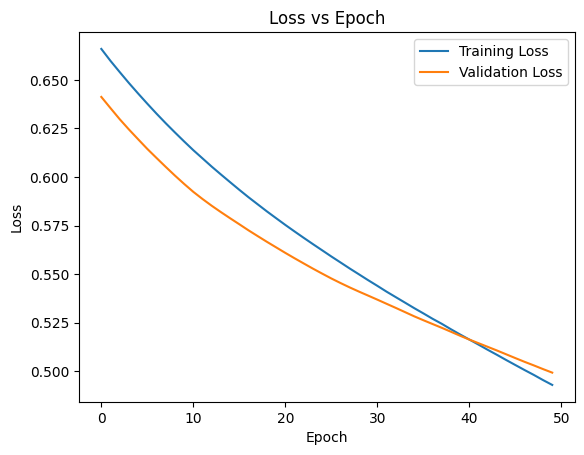

In [ ]:
# Plotting the training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.savefig('loss_vs_epoch.png')
plt.show()

## Logging with Weights and Biases

**Logging the following details:**
- Model architecture: Number of layers, neurons, activation functions.
- Hyperparameters: Learning rate, batch size, number of epochs.
- Training and validation loss per epoch.
- Final evaluation metrics.
- Confusion matrix and loss curve visualizations.

In [ ]:
# Logging using weights and biases
import wandb

# Take key from API.txt
with open('API.txt', 'r') as file:
    api_key = file.read()
wandb.login(key=api_key)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Praanshu IIT\_netrc
wandb: Currently logged in as: praanshu (praanshu-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Logging the model to weights and biases

# Initialize Weights & Biases
wandb.init(project="Asgn6")

# Log model architecture details
model_config = {
    "num_layers": len(model.layers),
    "layers": [layer.__class__.__name__ for layer in model.layers],
    "neurons": [layer.units if hasattr(layer, 'units') else None for layer in model.layers], 
    "activations": [layer.activation.__name__ for layer in model.layers if hasattr(layer, 'activation')],
}
wandb.config.update(model_config)

# Log hyperparameters
hyperparams = {
    "learning_rate": model.optimizer.learning_rate.numpy(),
    "batch_size": batch_size,
    "epochs": epochs,
}
wandb.config.update(hyperparams)

# Log training and validation loss per epoch
history_data = {"epoch": list(range(1, len(history.history['loss']) + 1)),
                "train_loss": history.history["loss"],
                "val_loss": history.history["val_loss"]}
for epoch, train_loss, val_loss in zip(*history_data.values()):
    wandb.log({"epoch": epoch, "train_loss": train_loss, "val_loss": val_loss})

# Final evaluation metrics
wandb.log({
    "accuracy": float(accuracy),
    "precision": float(precision),
    "recall": float(recall),
    "f1_score": float(f1)
}) 


# Log pre-generated confusion matrix
wandb.log({"confusion_matrix": wandb.Image("confusion_matrix.png")})

# Log pre-generated loss curve
wandb.log({"loss_curve": wandb.Image("loss_vs_epoch.png")})


# Finish logging
wandb.finish()

accuracy,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
f1_score,▁
precision,▁
recall,▁
train_loss,███▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁
val_loss,██▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
accuracy,0.7
epoch,50
f1_score,0.59355
precision,0.535


### **Screenshots:**

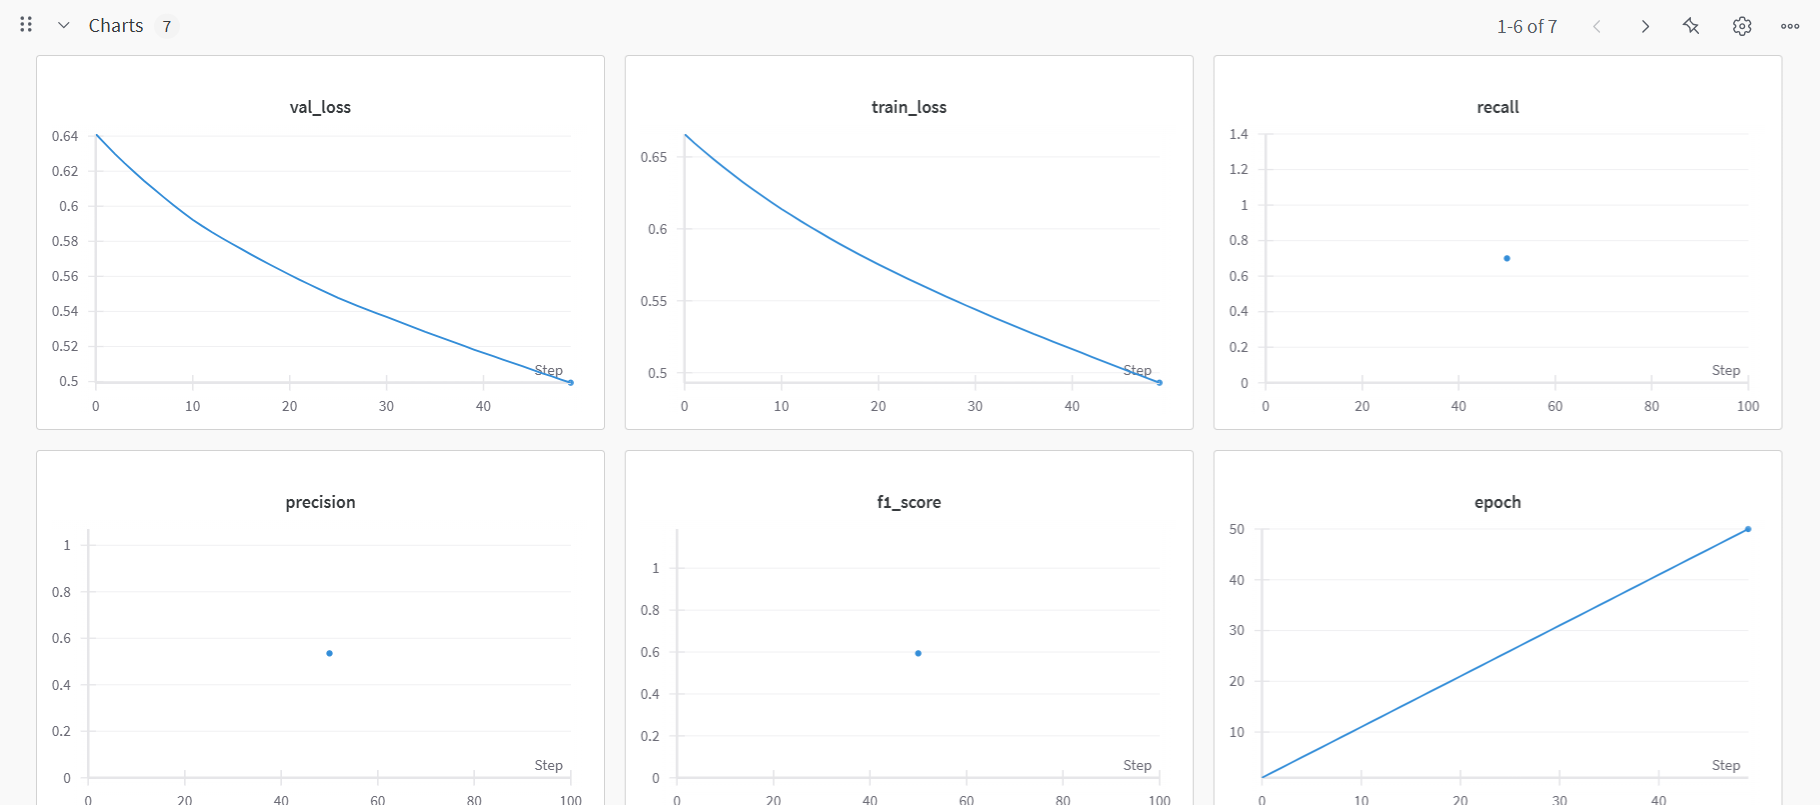

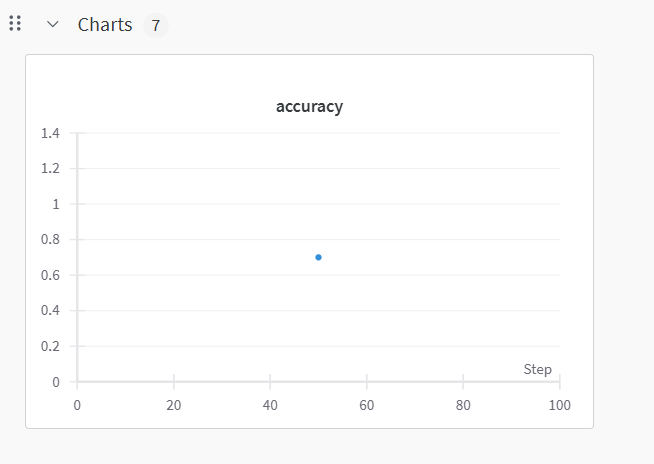

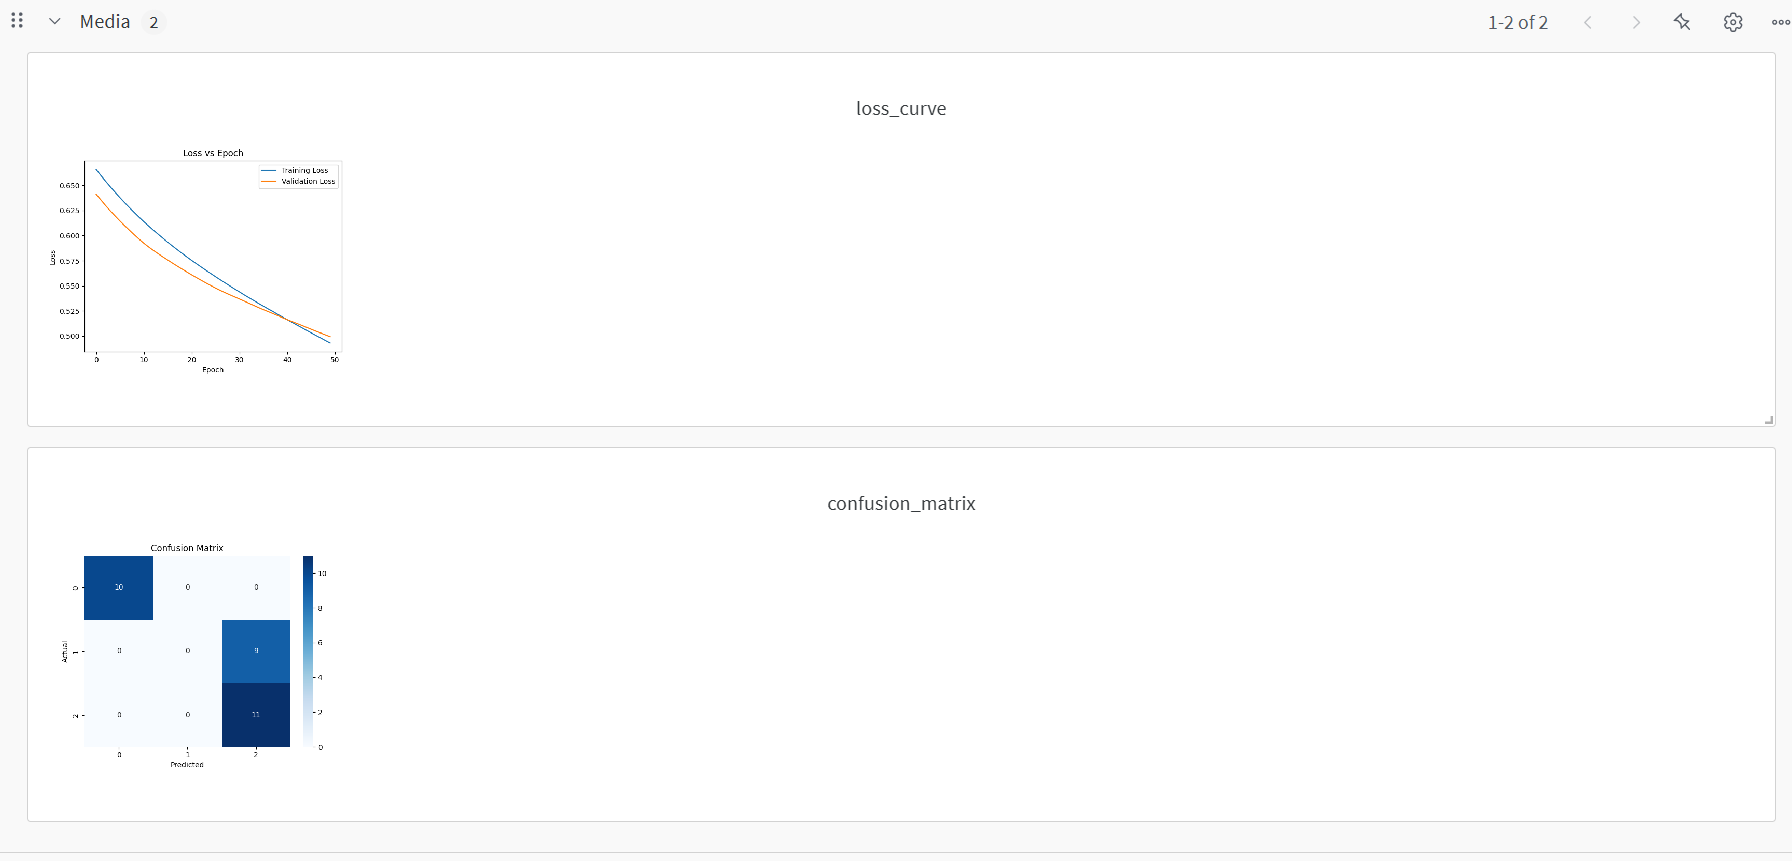

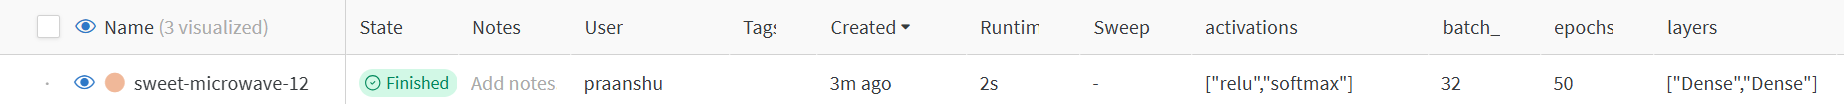

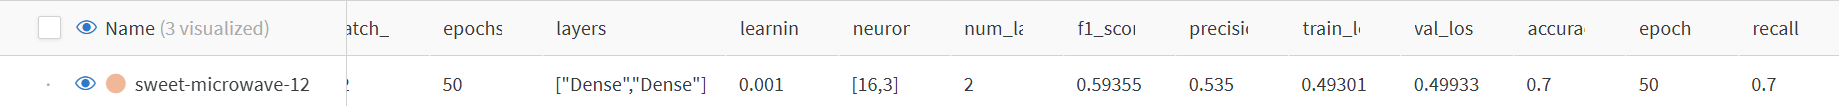

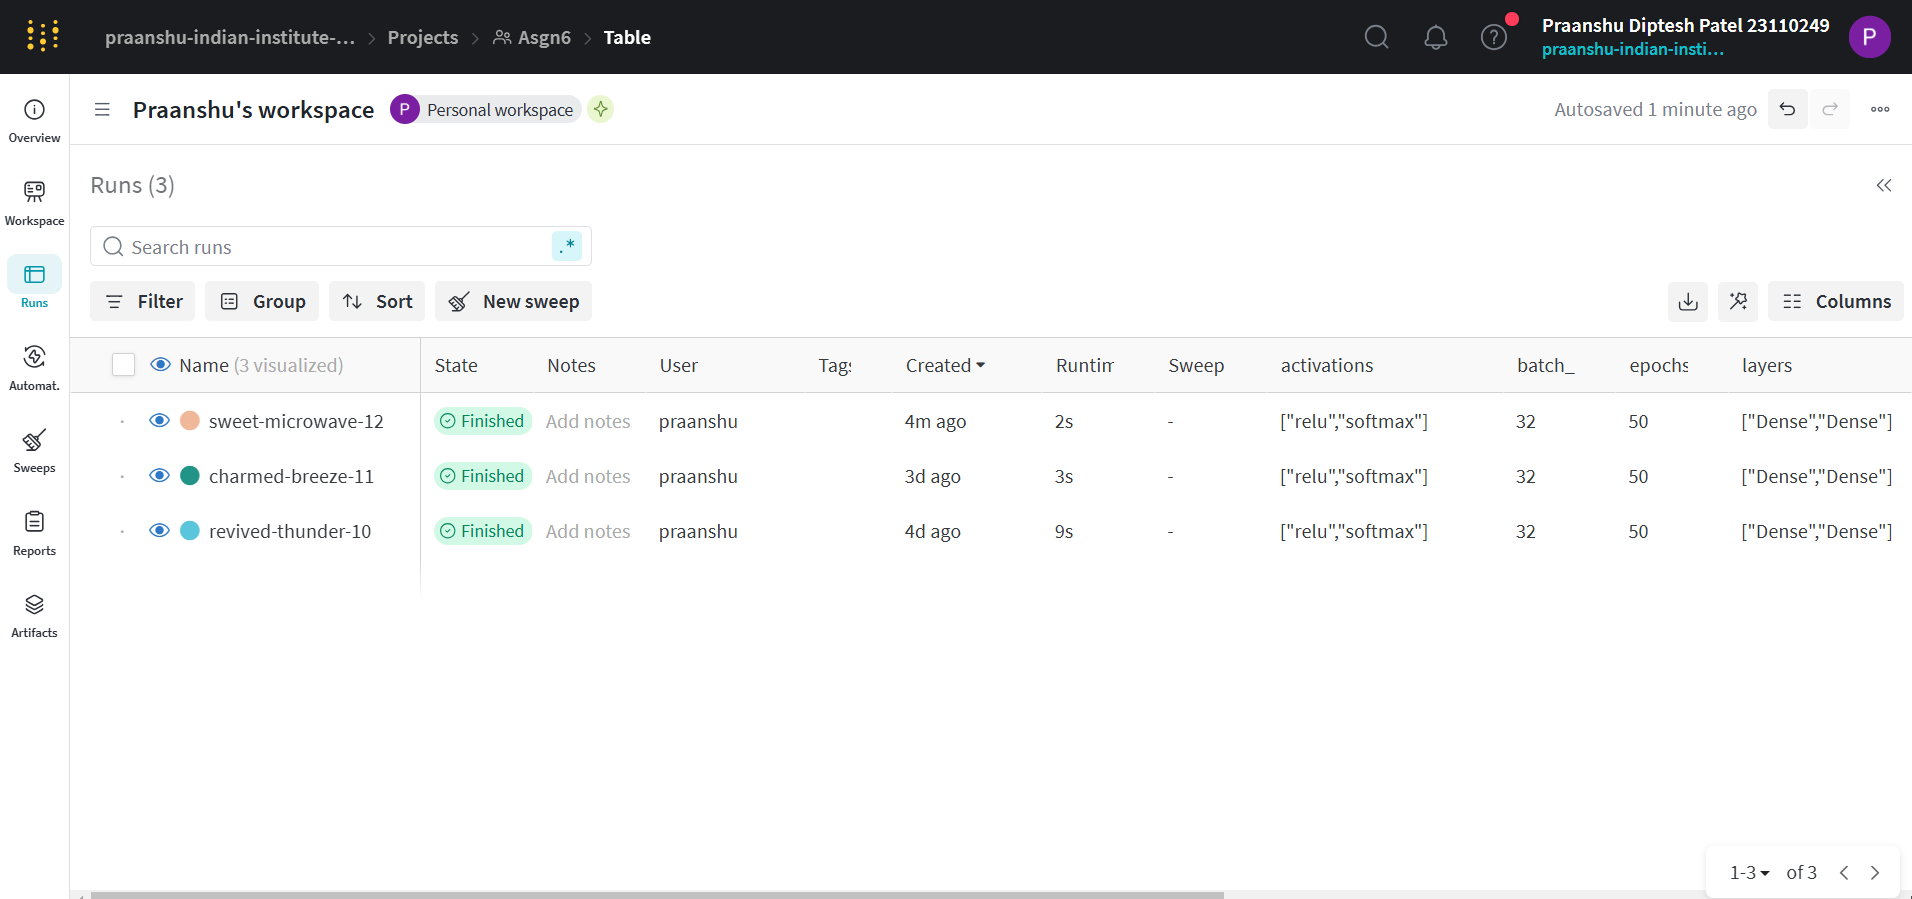

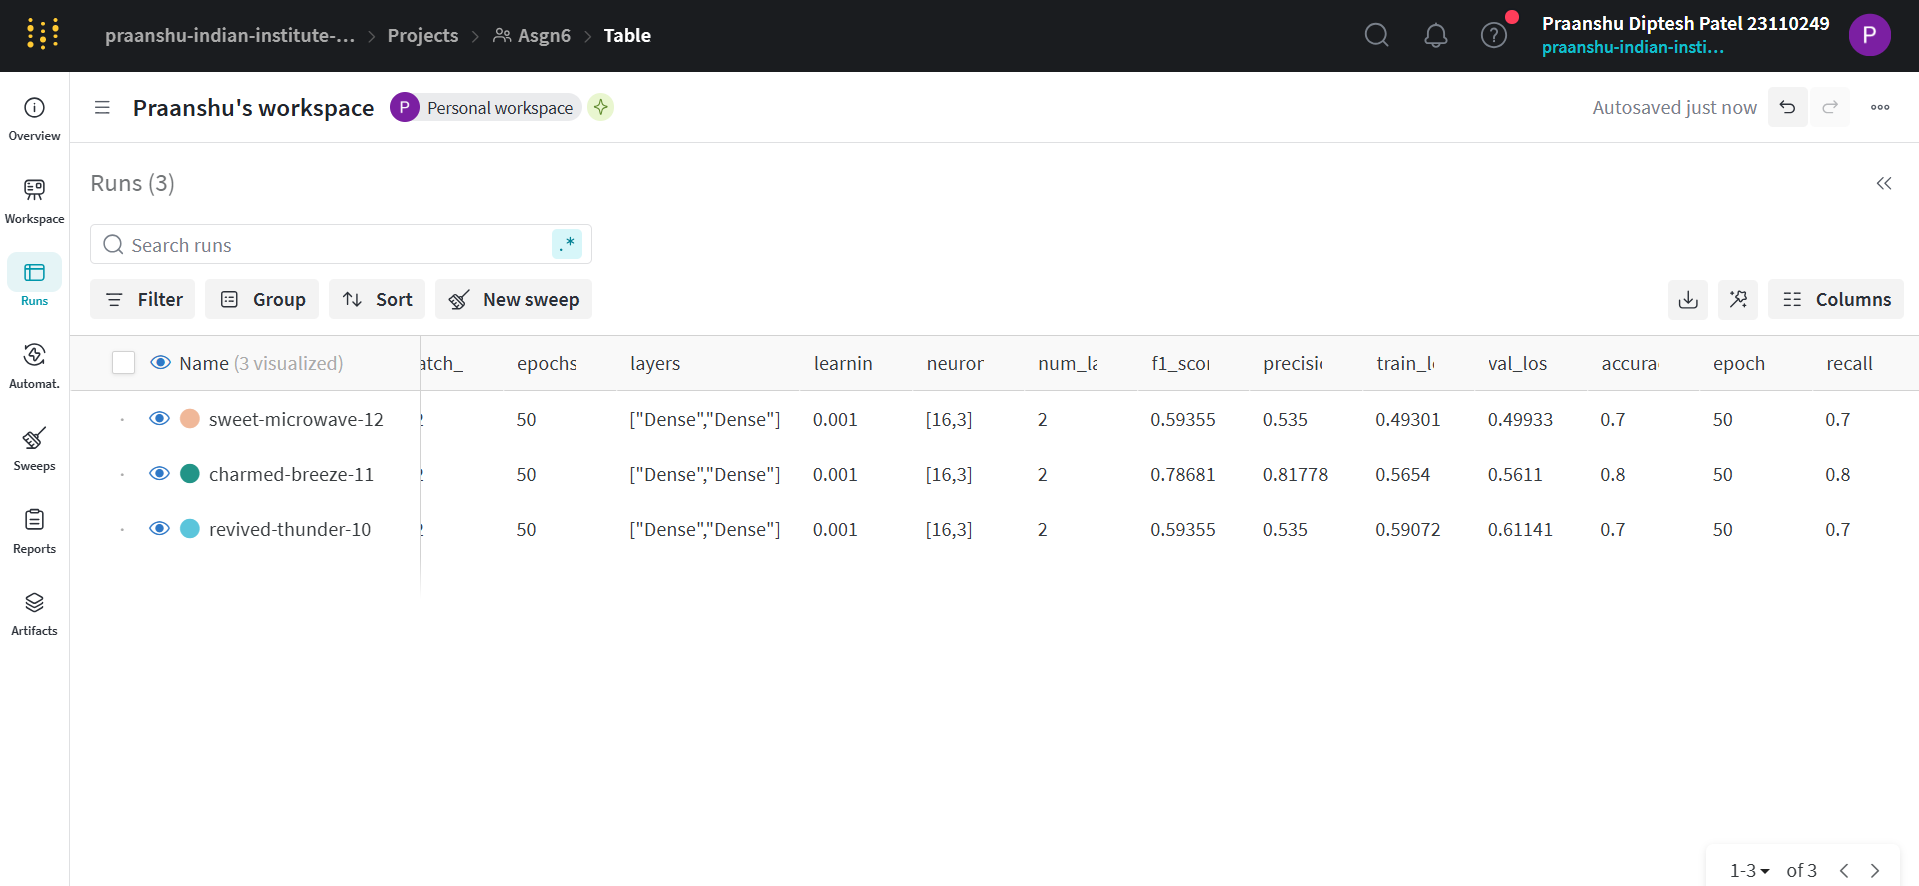

# Task 2


Use the model trained in the previous section.
Train the model on the batch size of [2 & 4], learning rate [1e-3 and 1e-5], and epochs [1, 3, and 5].
Train the model and measure the accuracy and F1 over the test set. Plot the confusion matrix over the test-set predictions.
Plot using the truth labels and predicted labels in matplotlib. 
Show the inputs, prediction, and truth values for five samples from the test set.



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [11]:
# Define parameters for grid search
param = {
    'batch_size': [2, 4],
    'learning_rate': [0.001, 1e-5],
    'epochs': [1, 3, 5]
}

results = []
for batch_size in param['batch_size']:
    for learning_rate in param['learning_rate']:
        for epochs in param['epochs']:
            print(f"\nTraining model with batch_size: {batch_size}, learning_rate: {learning_rate}, epochs: {epochs}")
            keras.backend.clear_session() # Clearing any existing model in memory

            # Defining the MLP model
            model = Sequential()
            model.add(Dense(16, input_dim=4, activation='relu'))
            model.add(Dense(3, activation='softmax'))

            # Compiling the model
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.BinaryCrossentropy())

            # Training the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                              verbose=1, validation_split=0.1)
            
            # Evaluating the model
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)

            # Calculate metrics
            accuracy = accuracy_score(y_test_classes, y_pred_classes)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
            
            # Store results
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1
            })

            # Storing the training and validation losses with par
            results[-1]['train_loss'] = history.history['loss']
            results[-1]['val_loss'] = history.history['val_loss']
            
            # store y_pred_classes and y_test_classes for confusion matrix
            results[-1]['y_pred_classes'] = y_pred_classes
            results[-1]['y_test_classes'] = y_test_classes
            

            # Show 5 sample predictions
            print("\nSample predictions:")
            print("Input Features | True Label | Predicted Label")
            print("-" * 50)
            for i in range(5):
                true_label = y_test_classes[i]
                pred_label = y_pred_classes[i]
                features = X_test[i]
                print(f"{features} | {true_label} | {pred_label}")
        
            # Print accuracy and F1 score
            print("For batch_size: {}, learning_rate: {}, epochs: {}".format(batch_size, learning_rate, epochs))
            print(f"\nAccuracy: {accuracy}")
            print(f"F1 Score: {f1}")



Training model with batch_size: 2, learning_rate: 0.001, epochs: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6668 - val_loss: 0.6301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 2, learning_rate: 0.001, epochs: 1

Accuracy: 0.3
F1 Score: 0.18620689655172415

Training model with batch_size: 2, learning_rate: 0.001, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6608 - val_loss: 0.6411
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.6306 - val_loss: 0.6133
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.6045 - val_loss: 0.5841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 2, learning_rate: 0.001, epochs: 3

Accuracy: 0.8
F1 Score: 0.7714285714285715

Training model with batch_size: 2, learning_rate: 0.001, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6658 - val_loss: 0.6318
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6262 - val_loss: 0.6110
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.6156 - val_loss: 0.5938
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.6038 - val_loss: 0.5745
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.5828 - val_loss: 0.5549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 2, learning_rate: 0.001, epochs: 5

Accuracy: 0.7
F1 Score: 0.5935483870967742

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6753 - val_loss: 0.6791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 0
For batch_size: 2, learning_rate: 1e-05, epochs: 1

Accuracy: 0.6333333333333333
F1 Score: 0.5722222222222223

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7391 - val_loss: 0.7485
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.7378 - val_loss: 0.7476
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.7434 - val_loss: 0.7467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 2, learning_rate: 1e-05, epochs: 3

Accuracy: 0.3
F1 Score: 0.1588235294117647

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6784 - val_loss: 0.6640
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.6794 - val_loss: 0.6635
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.6800 - val_loss: 0.6630
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.6759 - val_loss: 0.6625
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.6861 - val_loss: 0.6620
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 2, learning_rate: 1e-05, epochs: 5

Accuracy: 0.3
F1 Score: 0.13846153846153847

Training model with batch_size: 4, learning_rate: 0.001, epochs:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7510 - val_loss: 0.7342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 0
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 4, learning_rate: 0.001, epochs: 1

Accuracy: 0.1
F1 Score: 0.1375

Training model with batch_size: 4, learning_rate: 0.001, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6973 - val_loss: 0.6891
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6799 - val_loss: 0.6723
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6628 - val_loss: 0.6573
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 4, learning_rate: 0.001, epochs: 3

Accuracy: 0.7333333333333333
F1 Score: 0.6622222222222223

Training model with batch_size: 4, learning_rate: 0.001, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6611 - val_loss: 0.6257
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6430 - val_loss: 0.6129
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6237 - val_loss: 0.6014
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6197 - val_loss: 0.5898
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6017 - val_loss: 0.5792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 4, learning_rate: 0.001, epochs: 5

Accuracy: 0.5
F1 Score: 0.40849420849420853

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7102 - val_loss: 0.7324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 0
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 0
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 0
For batch_size: 4, learning_rate: 1e-05, epochs: 1

Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7620 - val_loss: 0.7789
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7934 - val_loss: 0.7786
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7687 - val_loss: 0.7783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 0
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 0
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 0
For batch_size: 4, learning_rate: 1e-05, epochs: 3

Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6285 - val_loss: 0.6216
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6305 - val_loss: 0.6214
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6249 - val_loss: 0.6213
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6301 - val_loss: 0.6211
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6322 - val_loss: 0.6209
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 4, learning_rate: 1e-05, epochs: 5

Accuracy: 0.7
F1 Score: 0.5935483870967742


For batch_size:  2 , learning_rate:  0.001 , epochs:  1
Loss:  [0.6585824489593506]
Validation Loss:  [0.6300890445709229]


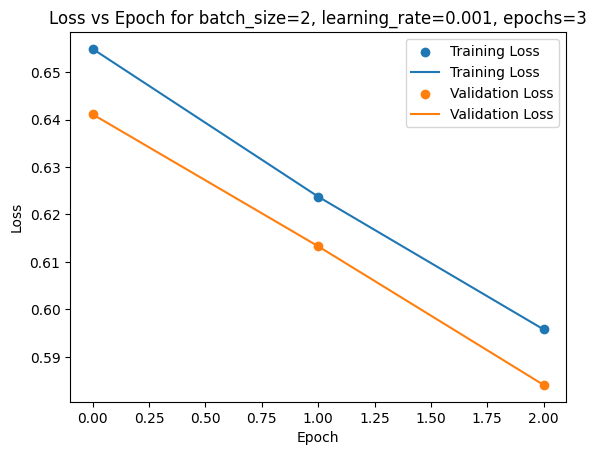

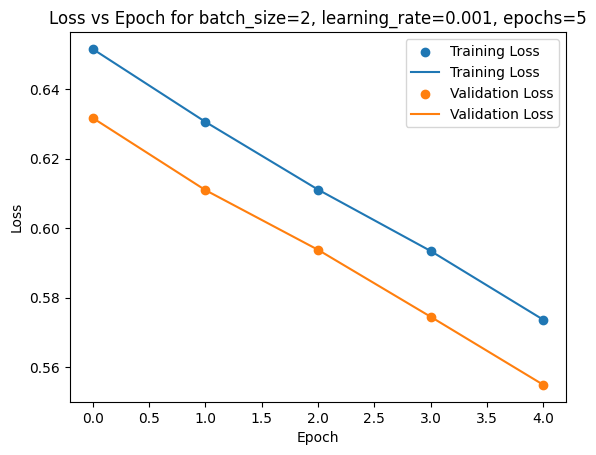

For batch_size:  2 , learning_rate:  1e-05 , epochs:  1
Loss:  [0.6812483668327332]
Validation Loss:  [0.6790611147880554]


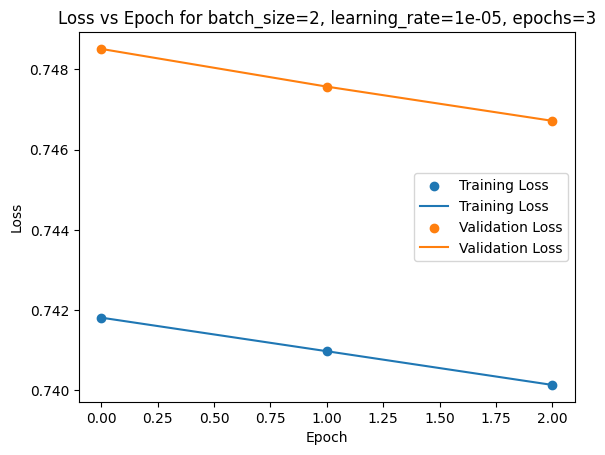

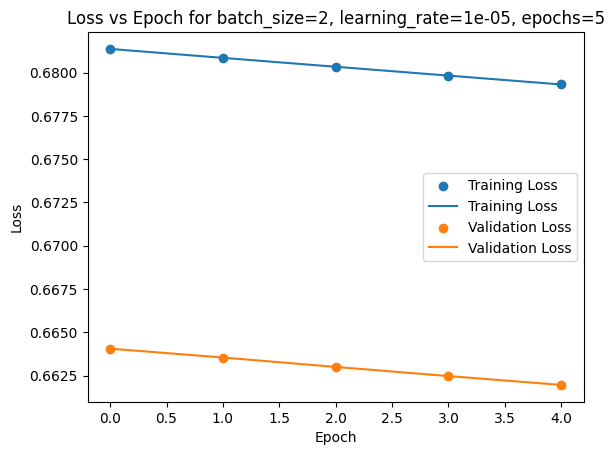

For batch_size:  4 , learning_rate:  0.001 , epochs:  1
Loss:  [0.7441646456718445]
Validation Loss:  [0.7341833114624023]


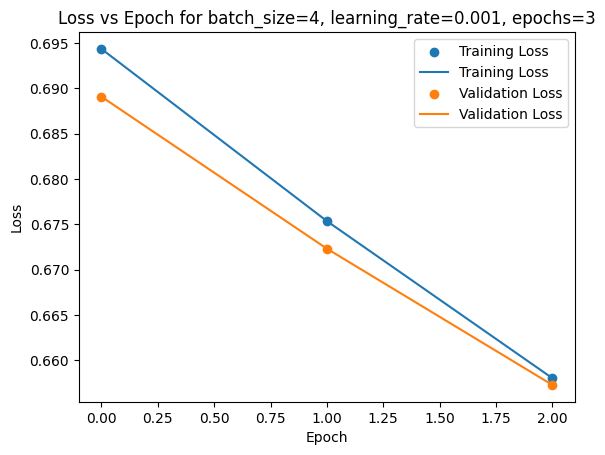

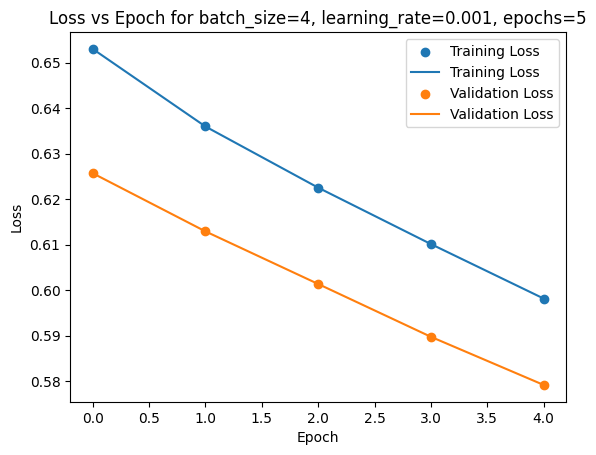

For batch_size:  4 , learning_rate:  1e-05 , epochs:  1
Loss:  [0.7167297005653381]
Validation Loss:  [0.7324466109275818]


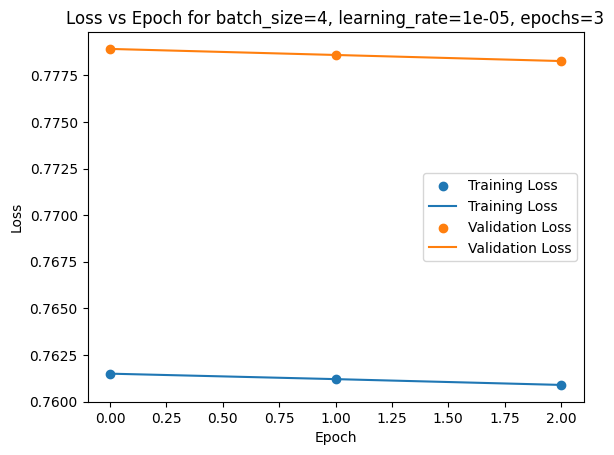

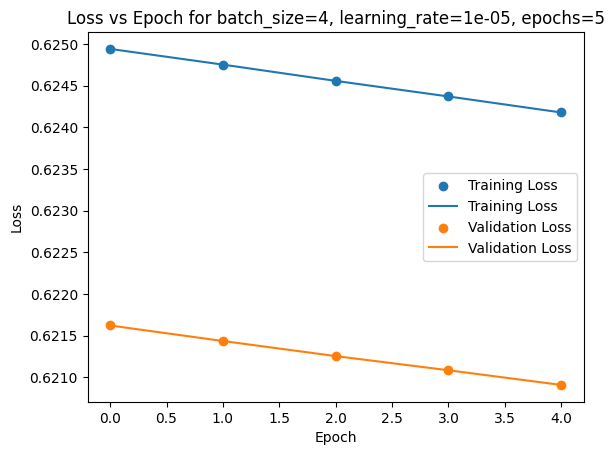

In [12]:
# Plotting seprate the training and validation losses for all hyperparameter combinations
for result in results:
    if result['epochs'] == 1:
        print("For batch_size: ",result['batch_size'],", learning_rate: ",result['learning_rate'],", epochs: ",result['epochs'])
        print("Loss: ",result['train_loss'])
        print("Validation Loss: ",result['val_loss'])
        continue

    plt.scatter(range(result['epochs']), result['train_loss'], label='Training Loss', marker='o')
    plt.plot(result['train_loss'], label='Training Loss')
    plt.scatter(range(result['epochs']), result['val_loss'], label='Validation Loss', marker='o')
    plt.plot(result['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Epoch for batch_size={result["batch_size"]}, learning_rate={result["learning_rate"]}, epochs={result["epochs"]}')
    plt.legend()
    plt.show()

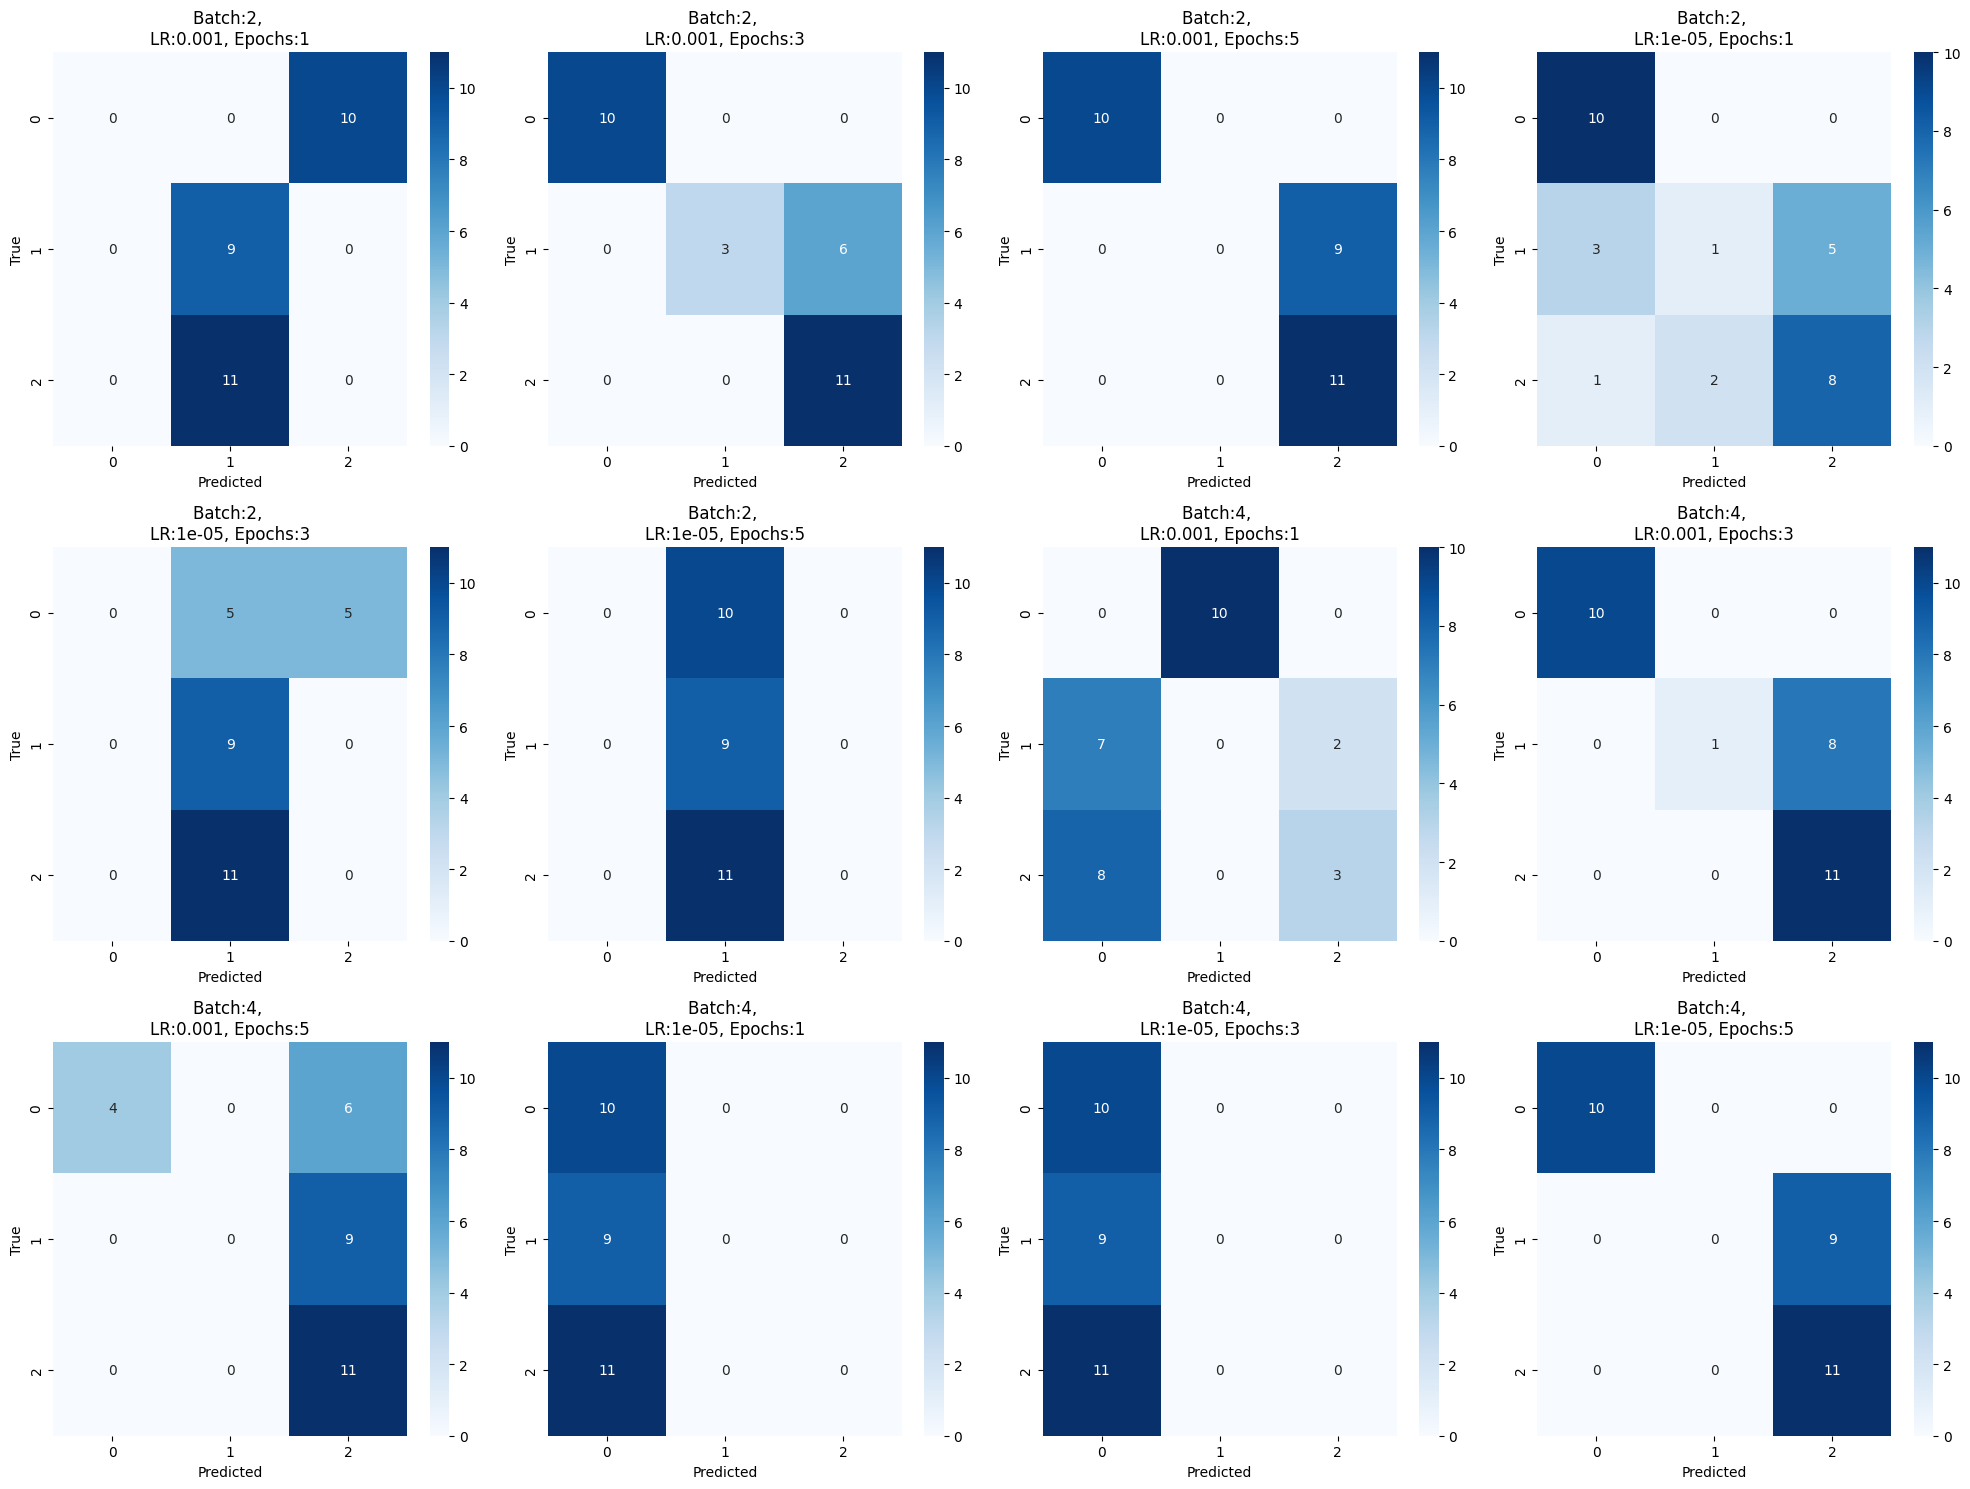

In [13]:
# Plotting confusion matrix for all configurations
plt.figure(figsize=(20, 15))
for i, result in enumerate(results):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns to accommodate all 12 configurations
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Batch:{result["batch_size"]}, \nLR:{result["learning_rate"]}, Epochs:{result["epochs"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()

plt.show()

In [14]:
best_result = max(results, key=lambda x: x['accuracy'])
print("\nBest configuration:")
print(f"Batch size: {best_result['batch_size']}")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"Epochs: {best_result['epochs']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"F1 Score: {best_result['f1']:.4f}")


Best configuration:
Batch size: 2
Learning rate: 0.001
Epochs: 3
Accuracy: 0.8000
F1 Score: 0.7714


In [15]:
%pip install autogluon

Note: you may need to restart the kernel to use updated packages.


In [16]:
import autogluon.common as ag
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd

# Load Iris dataset with proper one-hot encoding
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Split with stratification (70% train, 20% test, 10% holdout for bagging)
train_test, holdout = train_test_split(data, test_size=0.1, stratify=data['target'], random_state=42)
train, test = train_test_split(train_test, test_size=0.2/0.9, stratify=train_test['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)
holdout_data = TabularDataset(holdout)

# Configure neural network search space
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(1,3, 5),
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),
        'batch_size': ag.space.Categorical(2, 4),
        # 'layers': ag.space.Categorical([[4, 16, 3]]),
        'num_layers': 1,  # Number of HIDDEN layers
        'hidden_size': 16,  # Neurons per hidden layer
        'activation': 'relu'
    }
}

# Initialize predictor with bagged mode configuration
predictor = TabularPredictor(
    label='target',
    problem_type='multiclass',
    eval_metric='accuracy'
).fit(
    train_data=train_data,
    tuning_data=holdout_data,  # Required for use_bag_holdout
    hyperparameters=nn_hyperparameters,
    num_bag_folds=5,  # Enable bagging
    num_stack_levels=0,  # Disable stacking
    use_bag_holdout=True,  # Critical parameter
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'random'
    },
    time_limit=600
)

# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)




Fitted model: NeuralNetTorch_BAG_L1/11e5a_00000 ...
	0.4904	 = Validation score   (accuracy)
	5.65s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/11e5a_00001 ...
	0.6635	 = Validation score   (accuracy)
	2.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/11e5a_00002 ...
	0.3269	 = Validation score   (accuracy)
	3.43s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/11e5a_00003 ...
	0.4135	 = Validation score   (accuracy)
	3.12s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/11e5a_00004 ...
	0.6346	 = Validation score   (accuracy)
	2.8s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/11e5a_00005 ...
	0.3269	 = Validation score   (accuracy)
	2.8s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/11e5a_00006 ...
	0.0192	 = Validation score   (accuracy)
	2.

Test Accuracy: 0.7419
Test F1: 0.7233


In [17]:
config_table = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        # Since we can't directly access hyperparameters, we'll extract what we can from model name
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')
        
        # Create entry with available information
        config_table.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1,
            'Stack Level': model_row['stack_level'],
            'Fit Time': model_row['fit_time']
        })

# Display the configuration table
config_df = pd.DataFrame(config_table)
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])



Configuration Performance Table:
                               Model  Accuracy        F1
0  NeuralNetTorch_BAG_L1/11e5a_00008  0.741935  0.723325
1  NeuralNetTorch_BAG_L1/11e5a_00001  0.677419  0.555684
2  NeuralNetTorch_BAG_L1/11e5a_00004  0.548387  0.488479
3  NeuralNetTorch_BAG_L1/11e5a_00003  0.451613  0.430798
4  NeuralNetTorch_BAG_L1/11e5a_00000  0.354839  0.293738
5  NeuralNetTorch_BAG_L1/11e5a_00005  0.225806  0.168443
6  NeuralNetTorch_BAG_L1/11e5a_00002  0.225806  0.168443
7  NeuralNetTorch_BAG_L1/11e5a_00006  0.032258  0.032258
8  NeuralNetTorch_BAG_L1/11e5a_00007  0.032258  0.032258
9  NeuralNetTorch_BAG_L1/11e5a_00009  0.032258  0.033956


In [18]:


# Split with stratification (70% train, 20% test, 10% holdout for bagging)
train_test, holdout = train_test_split(data, test_size=0.1, stratify=data['target'], random_state=42)
train, test = train_test_split(train_test, test_size=0.2/0.9, stratify=train_test['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)
holdout_data = TabularDataset(holdout)

# Configure neural network search space
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(1,3, 5),
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),
        'batch_size': ag.space.Categorical(2, 4),
        'num_layers': 1,  # Number of HIDDEN layers
        'hidden_size': 16,  # Neurons per hidden layer
        'activation': 'relu'
    }
}

# Initialize predictor with bagged mode configuration
predictor = TabularPredictor(
    label='target',
    problem_type='multiclass',
    eval_metric='accuracy'
).fit(
    train_data=train_data,
    tuning_data=holdout_data,  # Required for use_bag_holdout
    hyperparameters=nn_hyperparameters,
    num_bag_folds=5,  # Enable bagging
    num_stack_levels=0,  # Disable stacking
    use_bag_holdout=True,  # Critical parameter
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'bayes'
    },
    # presets='best_quality',
    time_limit=600
)

# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# View search results
leaderboard = predictor.leaderboard(test_data)
print(leaderboard[['model', 'score_test', 'fit_time']])


Fitted model: NeuralNetTorch_BAG_L1/756550aa ...
	0.4904	 = Validation score   (accuracy)
	2.87s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/2ad20ecf ...
	0.3558	 = Validation score   (accuracy)
	4.25s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/6002f895 ...
	0.0385	 = Validation score   (accuracy)
	3.77s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/68800630 ...
	0.0385	 = Validation score   (accuracy)
	3.09s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/e5c90877 ...
	0.6635	 = Validation score   (accuracy)
	3.2s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/c1732265 ...
	0.0385	 = Validation score   (accuracy)
	3.14s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/893f887e ...
	0.0192	 = Validation score   (accuracy)
	3.09s	 = Training   ru

Test Accuracy: 0.6774
Test F1: 0.5484
                             model  score_test  fit_time
0   NeuralNetTorch_BAG_L1/e5c90877    0.677419  3.201714
1   NeuralNetTorch_BAG_L1/29dc400b    0.677419  3.025203
2   NeuralNetTorch_BAG_L1/889fc204    0.677419  3.117261
3              WeightedEnsemble_L2    0.677419  3.137230
4   NeuralNetTorch_BAG_L1/756550aa    0.354839  2.871324
5   NeuralNetTorch_BAG_L1/2ad20ecf    0.225806  4.252073
6   NeuralNetTorch_BAG_L1/f82afe94    0.225806  3.083770
7   NeuralNetTorch_BAG_L1/893f887e    0.032258  3.090324
8   NeuralNetTorch_BAG_L1/c1732265    0.032258  3.140472
9   NeuralNetTorch_BAG_L1/68800630    0.032258  3.091726
10  NeuralNetTorch_BAG_L1/6002f895    0.032258  3.768102


In [19]:
config_table = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')
        
        # Create entry with available information
        config_table.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1,
            'Stack Level': model_row['stack_level'],
            'Fit Time': model_row['fit_time']
        })

# Display the configuration table
config_df = pd.DataFrame(config_table)
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])




Configuration Performance Table:
                            Model  Accuracy        F1
0  NeuralNetTorch_BAG_L1/e5c90877  0.677419  0.555684
1  NeuralNetTorch_BAG_L1/29dc400b  0.677419  0.555684
2  NeuralNetTorch_BAG_L1/889fc204  0.677419  0.548387
3  NeuralNetTorch_BAG_L1/756550aa  0.354839  0.293738
4  NeuralNetTorch_BAG_L1/2ad20ecf  0.225806  0.168443
5  NeuralNetTorch_BAG_L1/f82afe94  0.225806  0.168443
6  NeuralNetTorch_BAG_L1/893f887e  0.032258  0.032258
7  NeuralNetTorch_BAG_L1/c1732265  0.032258  0.032258
8  NeuralNetTorch_BAG_L1/68800630  0.032258  0.032258
9  NeuralNetTorch_BAG_L1/6002f895  0.032258  0.032258
